Install the 'ucimlrepo' package for accessing UCI Machine Learning Repository datasets


In [1]:
!pip install ucimlrepo

Importing necessary libraries

In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting dataset and cross-validation
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
from ucimlrepo import fetch_ucirepo  # Fetches datasets from the UCI Machine Learning Repository
import requests  # For making HTTP requests to fetch data (if needed)
from sklearn.preprocessing import Normalizer, LabelEncoder, StandardScaler  # For normalizing and encoding data
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors algorithm for classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For evaluating the model's performance
from io import StringIO, BytesIO  # For handling string and byte-based I/O operations
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision tree algorithm and tree plotting
from sklearn import tree  # Additional tree utilities
from sklearn.svm import SVC  # Support Vector Classifier (SVM)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Random Forest and AdaBoost classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# 1) Завантажити дані, вивести назви колонок і розмір датасета

 Import the dataset

In [3]:
# fetch dataset
maternal_health_risk = fetch_ucirepo(id=863)
# data (as pandas dataframes)
X = maternal_health_risk.data.features
Y = maternal_health_risk.data.targets

Columns names

In [4]:
print(X.columns.to_list())

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


In [5]:
 X.shape

(1014, 6)

# 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.7 KB


In [7]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RiskLevel  1014 non-null   object
dtypes: object(1)
memory usage: 8.0+ KB


If Y is a DataFrame, convert it to a Series by selecting the first column

This ensures we are working with a single target variable rather than a full DataFrame


# 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

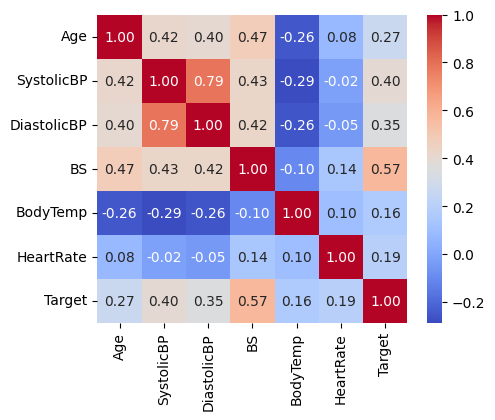

In [8]:
if isinstance(Y, pd.DataFrame):
    Y = Y.iloc[:, 0]  # Convert DataFrame to Series by selecting the first column

# Create a mapping dictionary to convert categorical risk levels into numerical values
# 'low risk' -> 0, 'mid risk' -> 0.5, 'high risk' -> 1
risk_mapping = {'low risk': 0, 'mid risk': 0.5, 'high risk': 1}
# Apply the mapping to the target variable Y, replacing categorical values with the corresponding numerical values
Y_encoded = Y.map(risk_mapping)  # Y is a Series
# Add the encoded target variable to the feature set X as a new column named 'Target'
X['Target'] = Y_encoded
# Calculate the correlation matrix of the features in X, including the newly added 'Target' column
corr = X.corr()
# Create a figure and axis for the heatmap with a specific size
fig, ax = plt.subplots(figsize=(5, 4))
# Use Seaborn to create a heatmap showing the correlation matrix
# 'cmap' sets the color map for the heatmap, and 'annot=True' adds numerical annotations to each cell
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

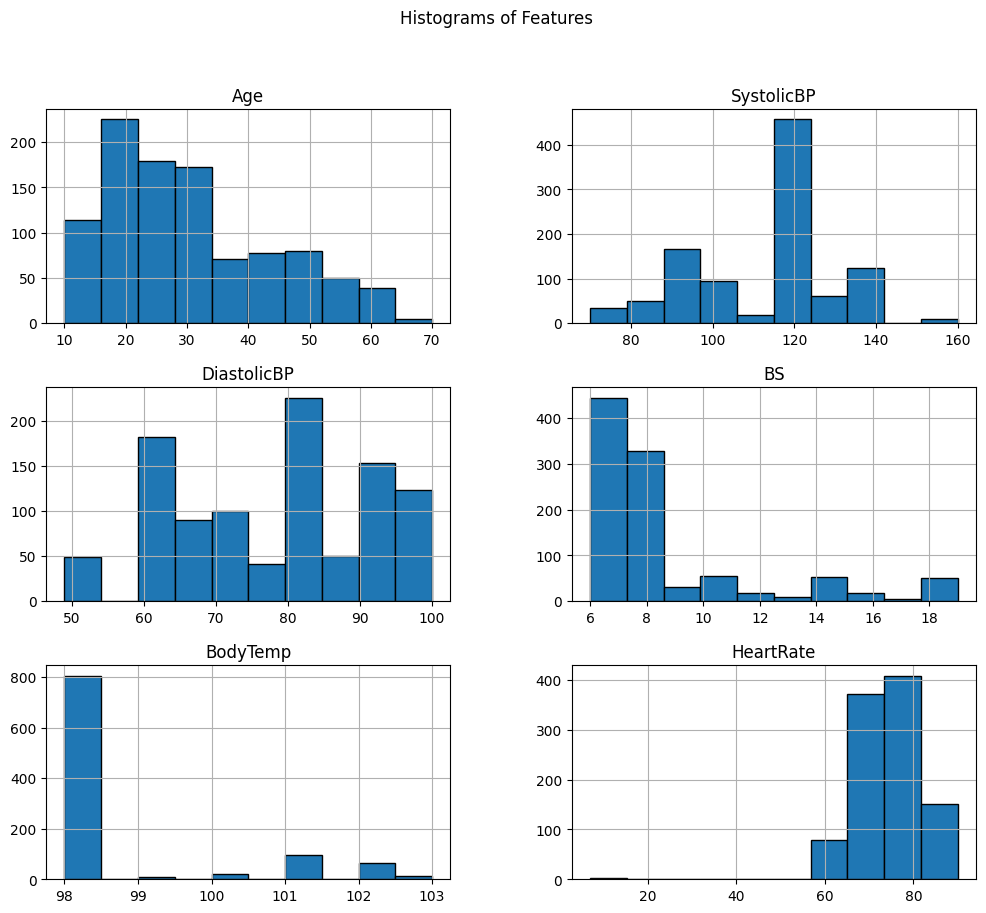

In [9]:
# Select all columns from X except the last one (which is the 'Target' column) for plotting
features_to_plot = X.columns[:-1]  # Exclude the target column 'Target'

# Plot histograms for each of the selected features
# 'figsize' specifies the size of the entire figure, 'bins' sets the number of bins for the histograms,
# and 'edgecolor' ensures the bars have a black outline for clarity
X[features_to_plot].hist(figsize=(12, 10), bins=10, edgecolor='black')

# Add a title for the entire figure to describe the content
plt.suptitle('Histograms of Features')

# Display the histograms
plt.show()


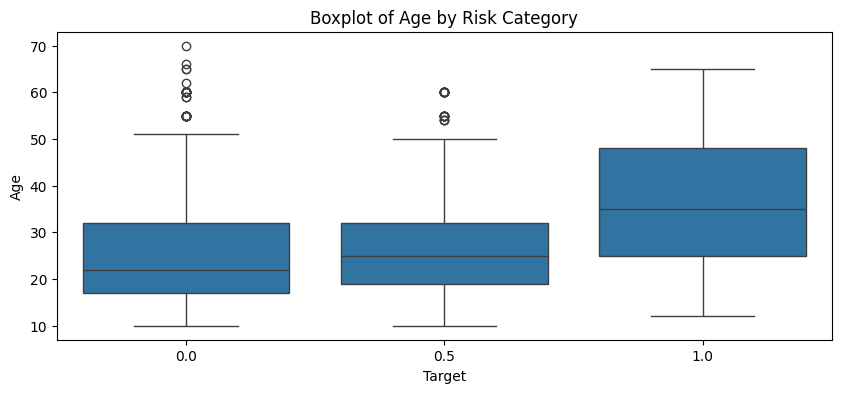

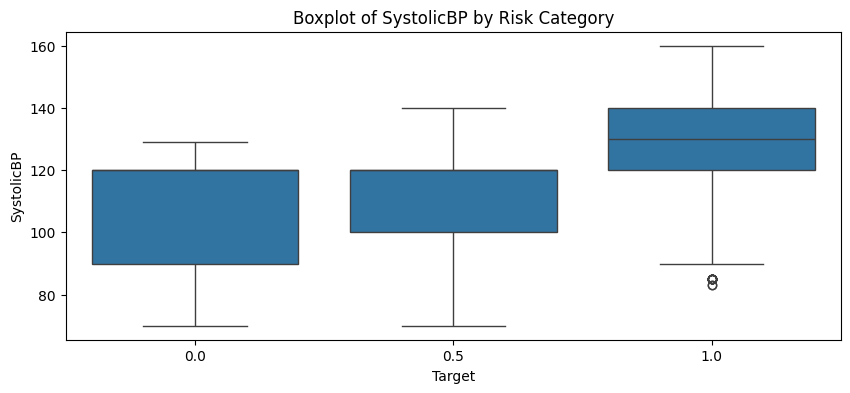

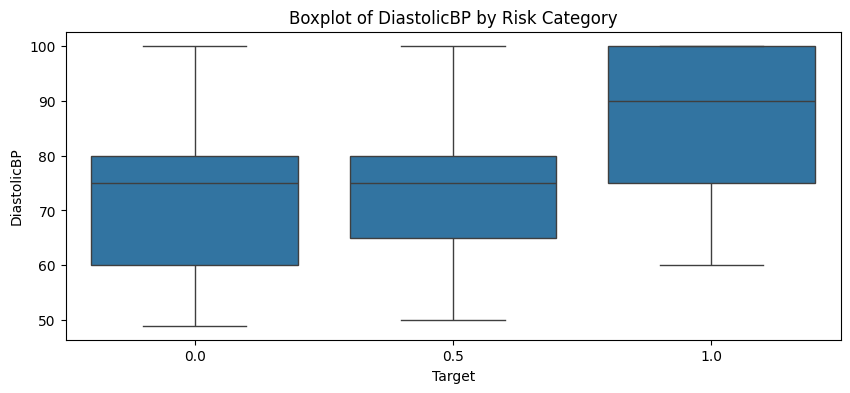

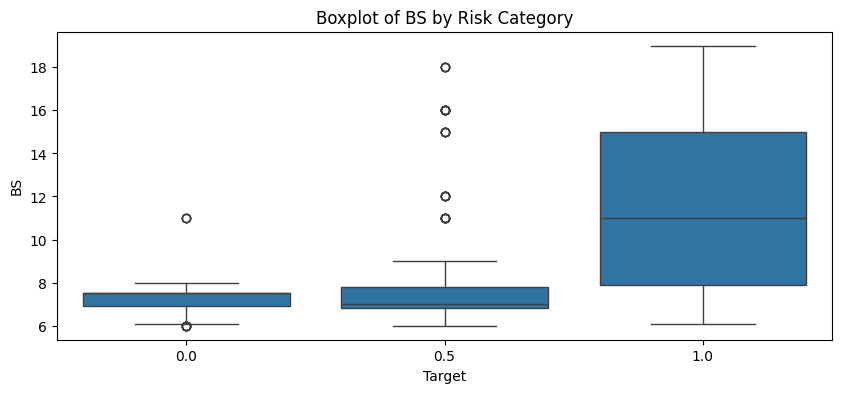

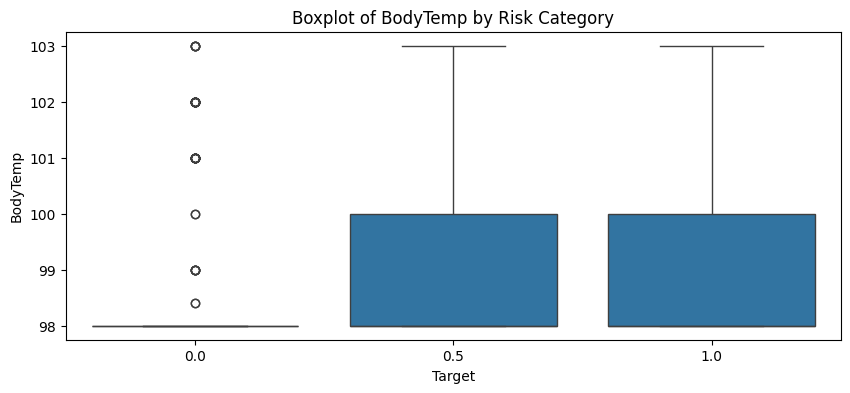

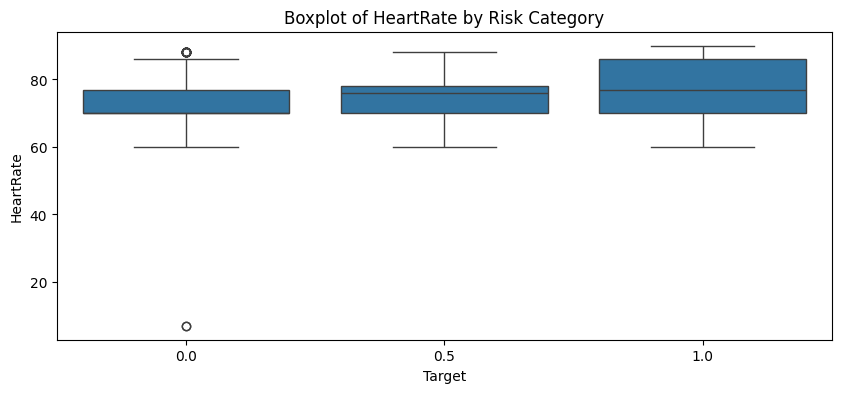

In [10]:
# 3. Boxplots of Features with Respect to Target (Risk Category)
# Loop through each feature in the 'features_to_plot' list
for feature in features_to_plot:
    # Create a new figure for each feature, specifying the figure size
    plt.figure(figsize=(10, 4))

    # Use Seaborn's boxplot function to plot the distribution of the feature for each 'Target' (risk category)
    # 'x' is set to 'Target' (risk category), 'y' is the feature being plotted, and 'data' is the dataset X
    sns.boxplot(x='Target', y=feature, data=X)

    # Set the title for each plot, dynamically including the feature's name in the title
    plt.title(f'Boxplot of {feature} by Risk Category')

    # Display the boxplot for the current feature
    plt.show()


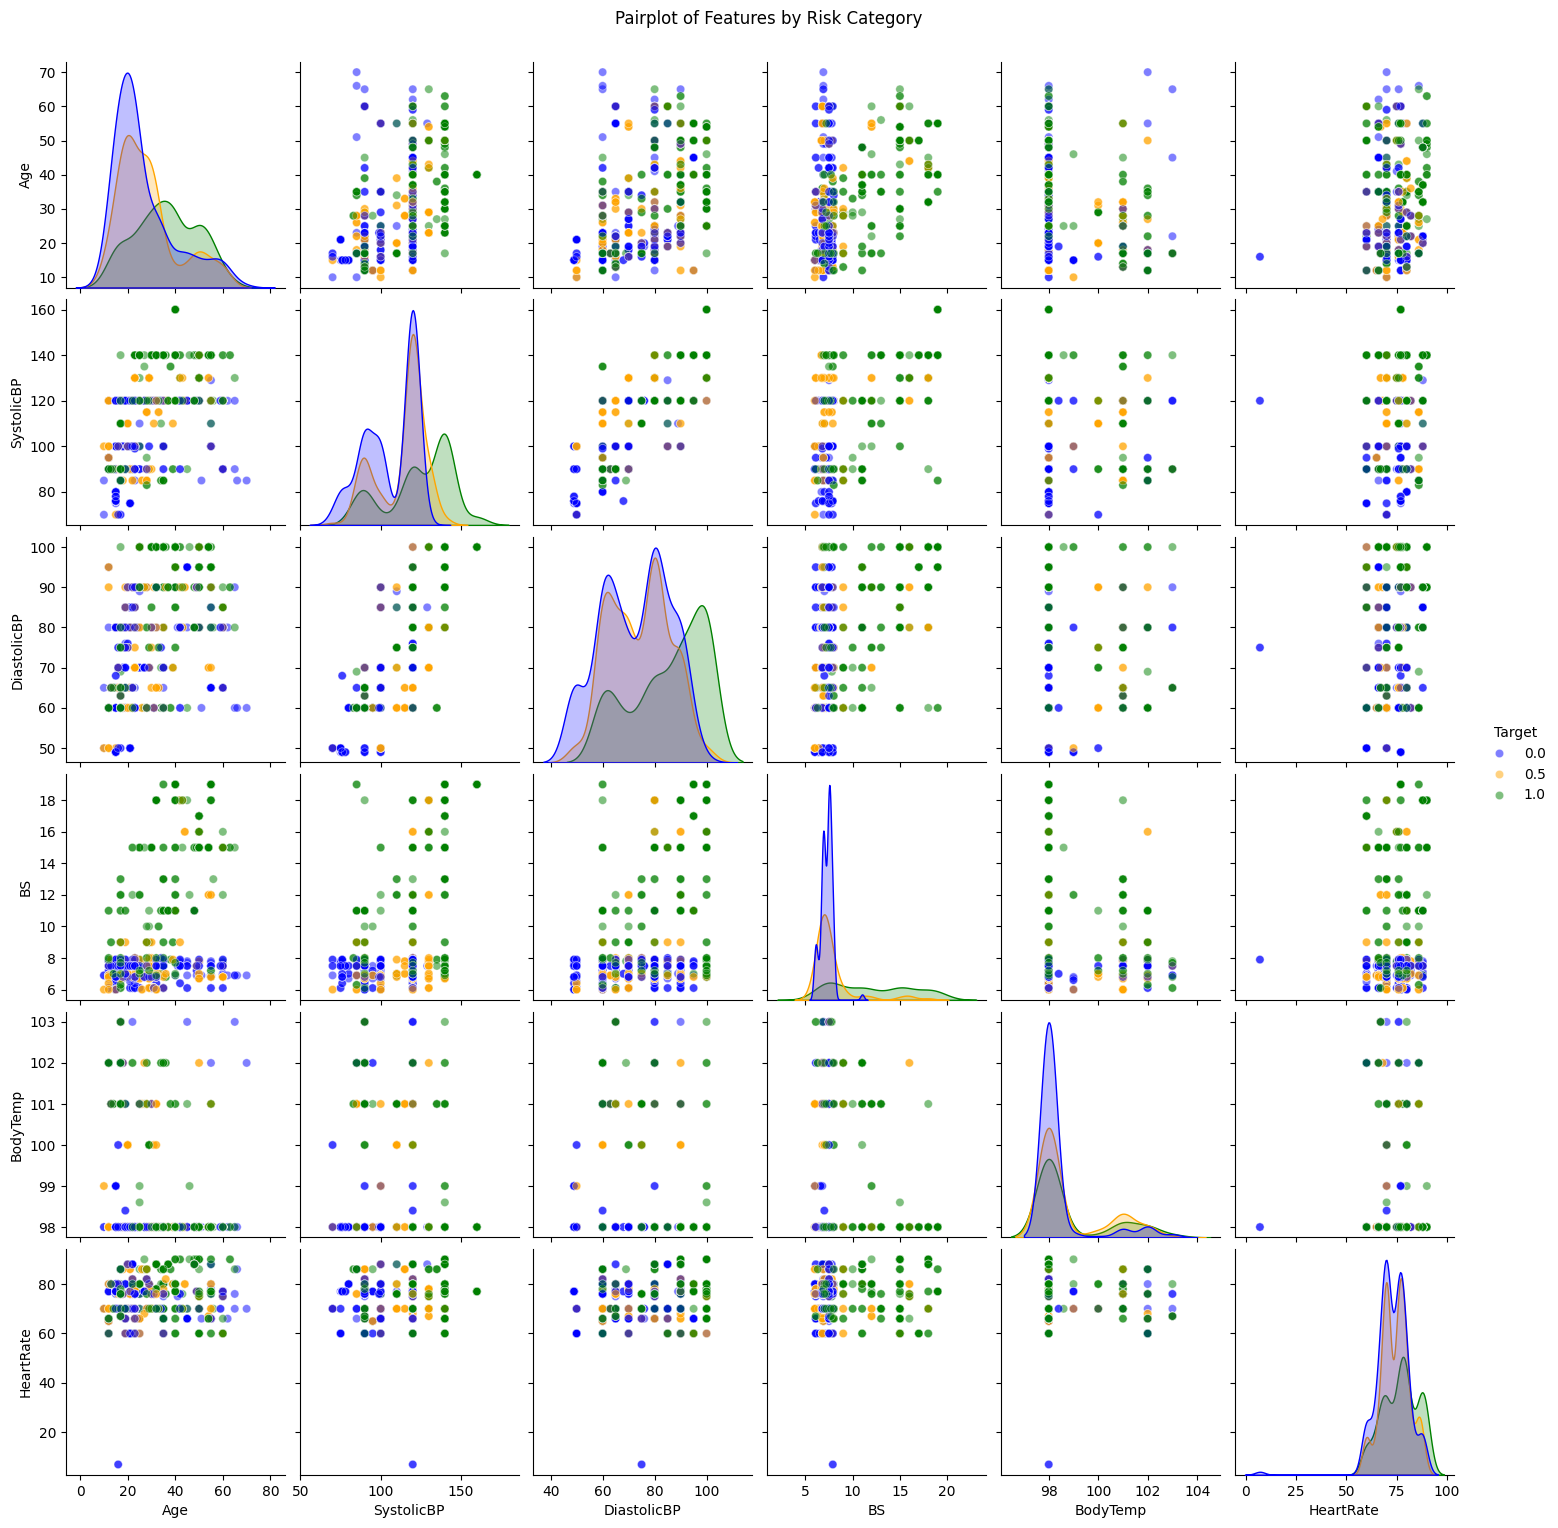

In [11]:
# 4. Pairplot
# Define a color palette for the target classes
palette = {0: 'blue', 0.5: 'orange', 1: 'green'}

# Plot pairplot
sns.pairplot(X, hue='Target', palette=palette, plot_kws={'alpha':0.5}, diag_kind='kde')
plt.suptitle('Pairplot of Features by Risk Category', y=1.02)  # Adjust title position
plt.show()

# 4) Нормалізувати дані

In [12]:
features = X.drop(columns=['Target'])

# Initialize the Normalizer
normalizer = Normalizer()

# Fit and transform the features
features_normalized = pd.DataFrame(normalizer.fit_transform(features), columns=features.columns)

# Add the target column back
X_normalized = pd.concat([features_normalized, X['Target']], axis=1)

# Check the normalized data
print(X_normalized.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  Target
0  0.123241    0.640853     0.394371  0.073945  0.483105   0.423949     1.0
1  0.167623    0.670494     0.431032  0.062260  0.469346   0.335247     1.0
2  0.166587    0.516994     0.402106  0.045955  0.574438   0.459550     1.0
3  0.145903    0.680880     0.413392  0.034044  0.476616   0.340440     1.0
4  0.188046    0.644731     0.322365  0.032774  0.526530   0.408330     0.0


# kNN

In [13]:


# Ensure features and target variable are defined
# X = features (DataFrame containing your features)
# Y = target variable

# Encode the target variable if necessary
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.20)

normalizer = Normalizer()
normalizer.fit(X_train)
scaled_X_train = normalizer.transform(X_train)
scaled_X_test = normalizer.transform(X_test)


knn = KNeighborsClassifier()

# Train the model
knn.fit(scaled_X_train, y_train)

# Make predictions
pred = knn.predict(scaled_X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))


[[39 11  2]
 [ 8 51 24]
 [ 6 21 41]]

              precision    recall  f1-score   support

   high risk       0.74      0.75      0.74        52
    low risk       0.61      0.61      0.61        83
    mid risk       0.61      0.60      0.61        68

    accuracy                           0.65       203
   macro avg       0.65      0.66      0.65       203
weighted avg       0.64      0.65      0.64       203



The optimal k is 1


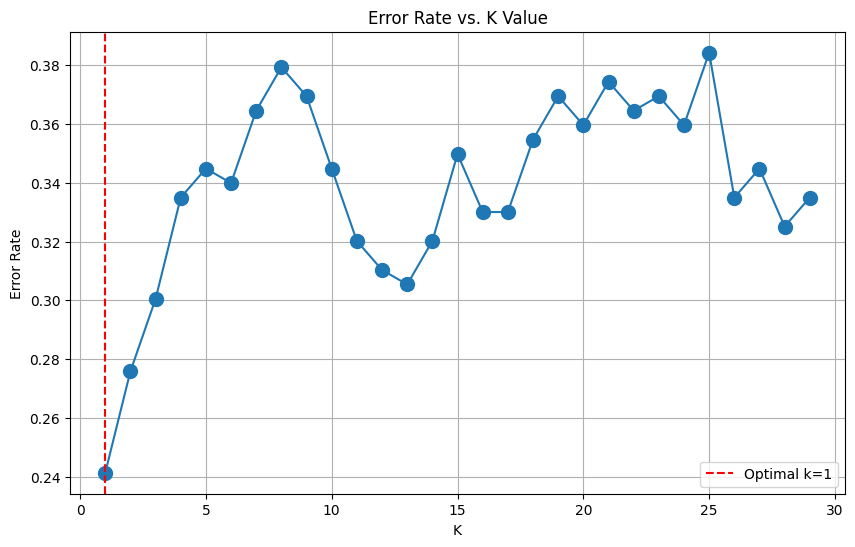

In [14]:
# Placeholder for error rates
error_rate = []
# Assuming error_rate and k values are computed as shown previously
k_values = range(1, 30)

# Loop through k values to compute the error rate for each k in KNN
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)

    # Calculate the misclassification error rate and append it
    error_rate.append(np.mean(pred_k != y_test))

optimal_k = k_values[np.argmin(error_rate)]  # Find the k with the minimum error rate

print(f'The optimal k is {optimal_k}')

# Plot the error rate vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rate, marker='o', markersize=10)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()
plt.grid()
plt.show()


In [15]:


knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))


[[44  6  2]
 [ 7 60 16]
 [ 4  8 56]]

              precision    recall  f1-score   support

   high risk       0.80      0.85      0.82        52
    low risk       0.81      0.72      0.76        83
    mid risk       0.76      0.82      0.79        68

    accuracy                           0.79       203
   macro avg       0.79      0.80      0.79       203
weighted avg       0.79      0.79      0.79       203



Accuracy: 0.84
Confusion Matrix:
[[54  3  3]
 [ 1 63 13]
 [ 1 12 53]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.96      0.90      0.93        60
    low risk       0.81      0.82      0.81        77
    mid risk       0.77      0.80      0.79        66

    accuracy                           0.84       203
   macro avg       0.85      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203



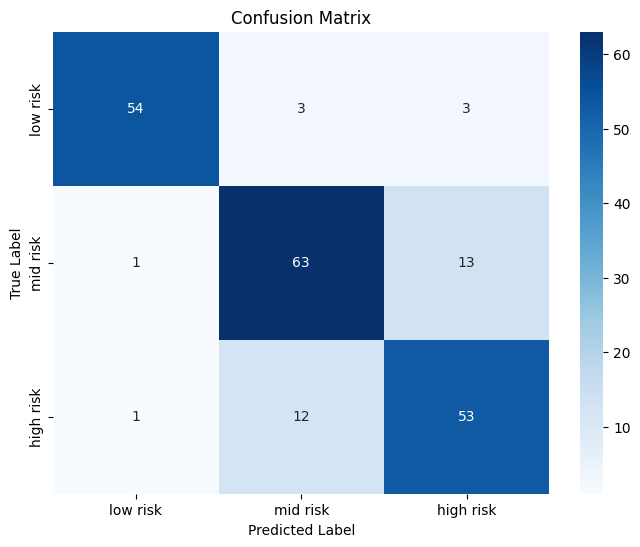

In [16]:


X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2)

# Normalize the features using StandardScaler
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the KNN classifier
knn = KNeighborsClassifier( n_neighbors=optimal_k)

# Train the KNN model
knn.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = knn.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['low risk', 'mid risk', 'high risk'],
            yticklabels=['low risk', 'mid risk', 'high risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Дерево ухвалення рішень

In [17]:

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.93      0.93      0.93        60
    low risk       0.85      0.78      0.81        77
    mid risk       0.72      0.79      0.75        66

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203

[[56  1  3]
 [ 0 60 17]
 [ 4 10 52]]


              precision    recall  f1-score   support

   high risk       0.92      0.95      0.93        60
    low risk       0.85      0.83      0.84        77
    mid risk       0.79      0.79      0.79        66

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.85       203
weighted avg       0.85      0.85      0.85       203

[[57  1  2]
 [ 1 64 12]
 [ 4 10 52]]


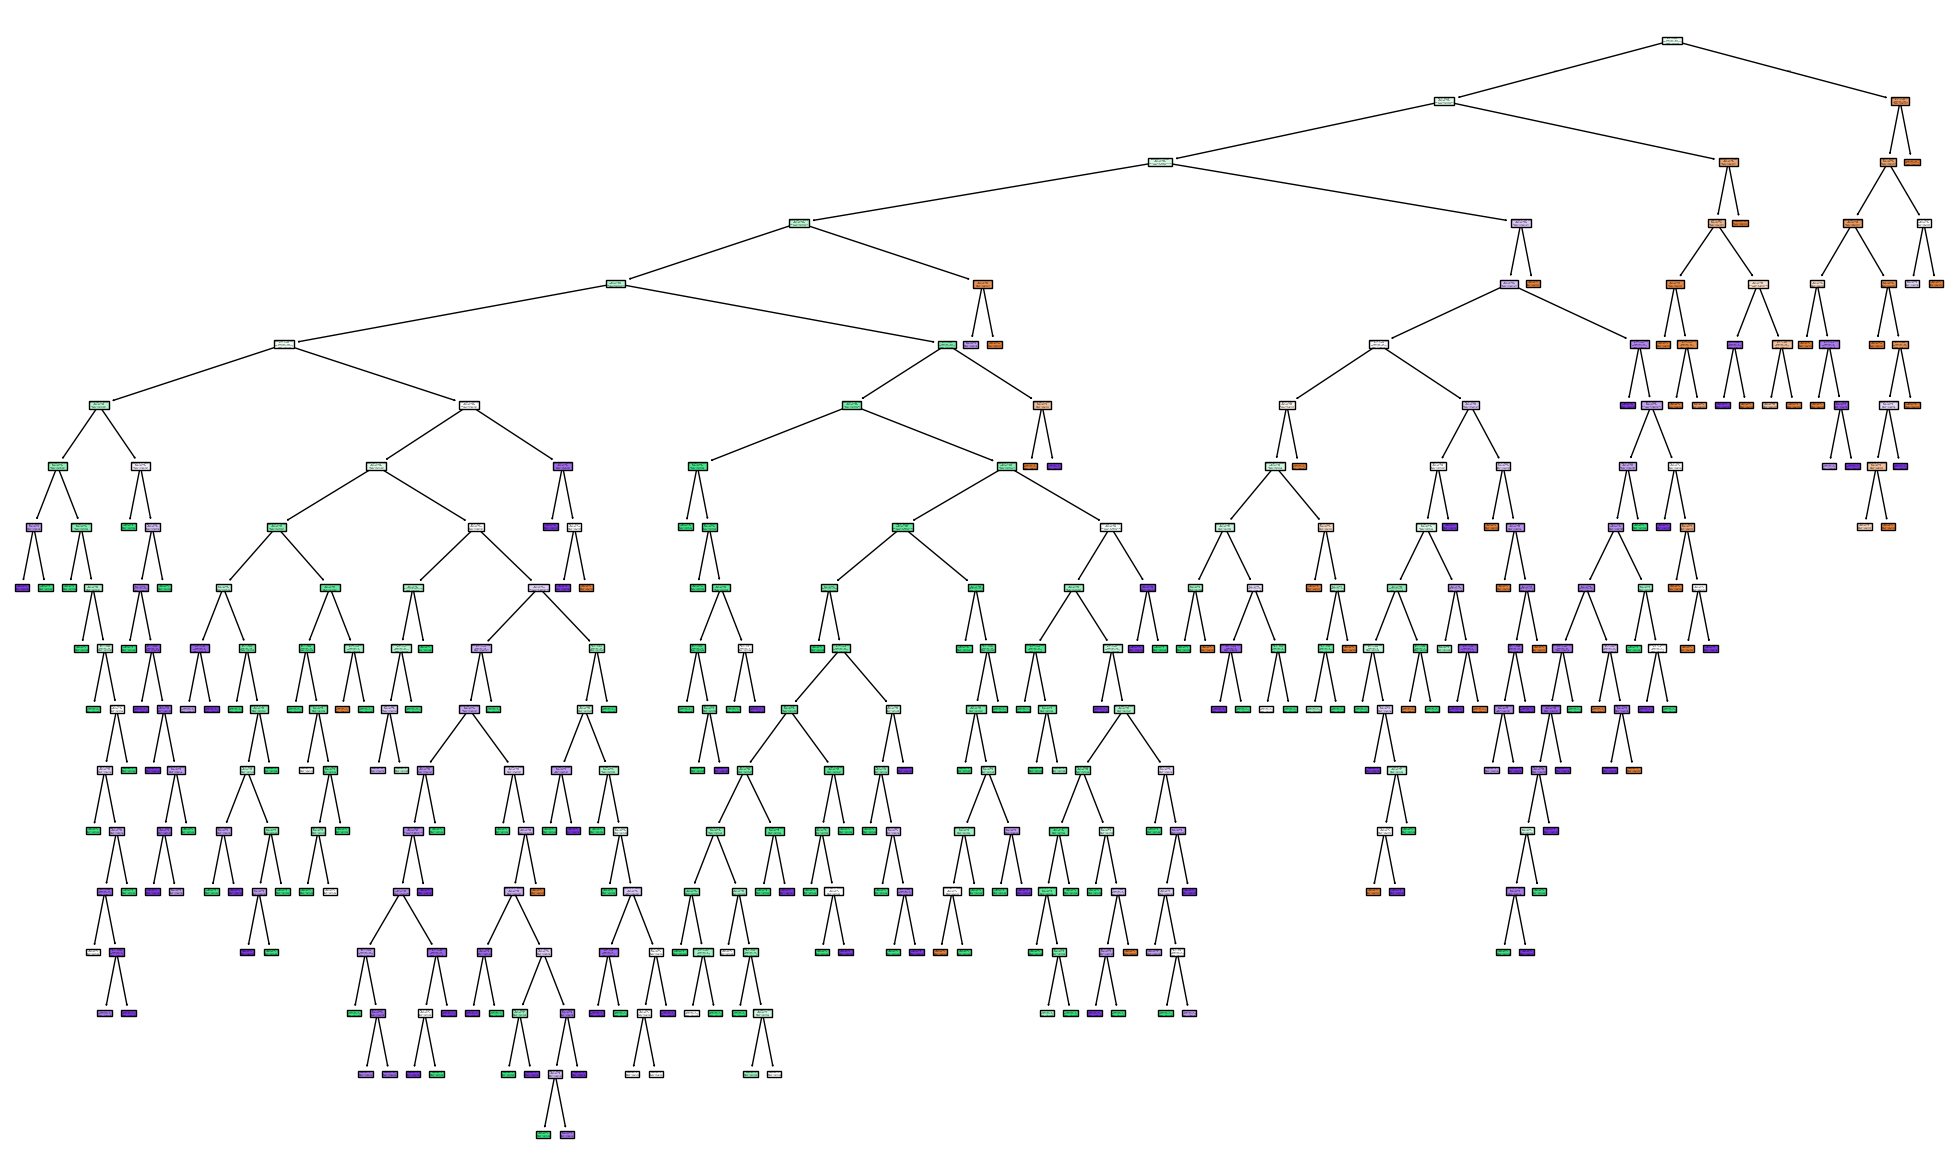

In [18]:
model = DecisionTreeClassifier(criterion='gini',splitter = 'random')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
plt.figure(figsize = (25, 15))
plot_tree(model, feature_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
          class_names = ['low risk', 'mid risk', 'high risk'], filled = True)
plt.show()


              precision    recall  f1-score   support

   high risk       0.80      0.92      0.85        60
    low risk       0.74      0.56      0.64        77
    mid risk       0.50      0.58      0.54        66

    accuracy                           0.67       203
   macro avg       0.68      0.68      0.67       203
weighted avg       0.68      0.67      0.67       203

[[55  1  4]
 [ 0 43 34]
 [14 14 38]]


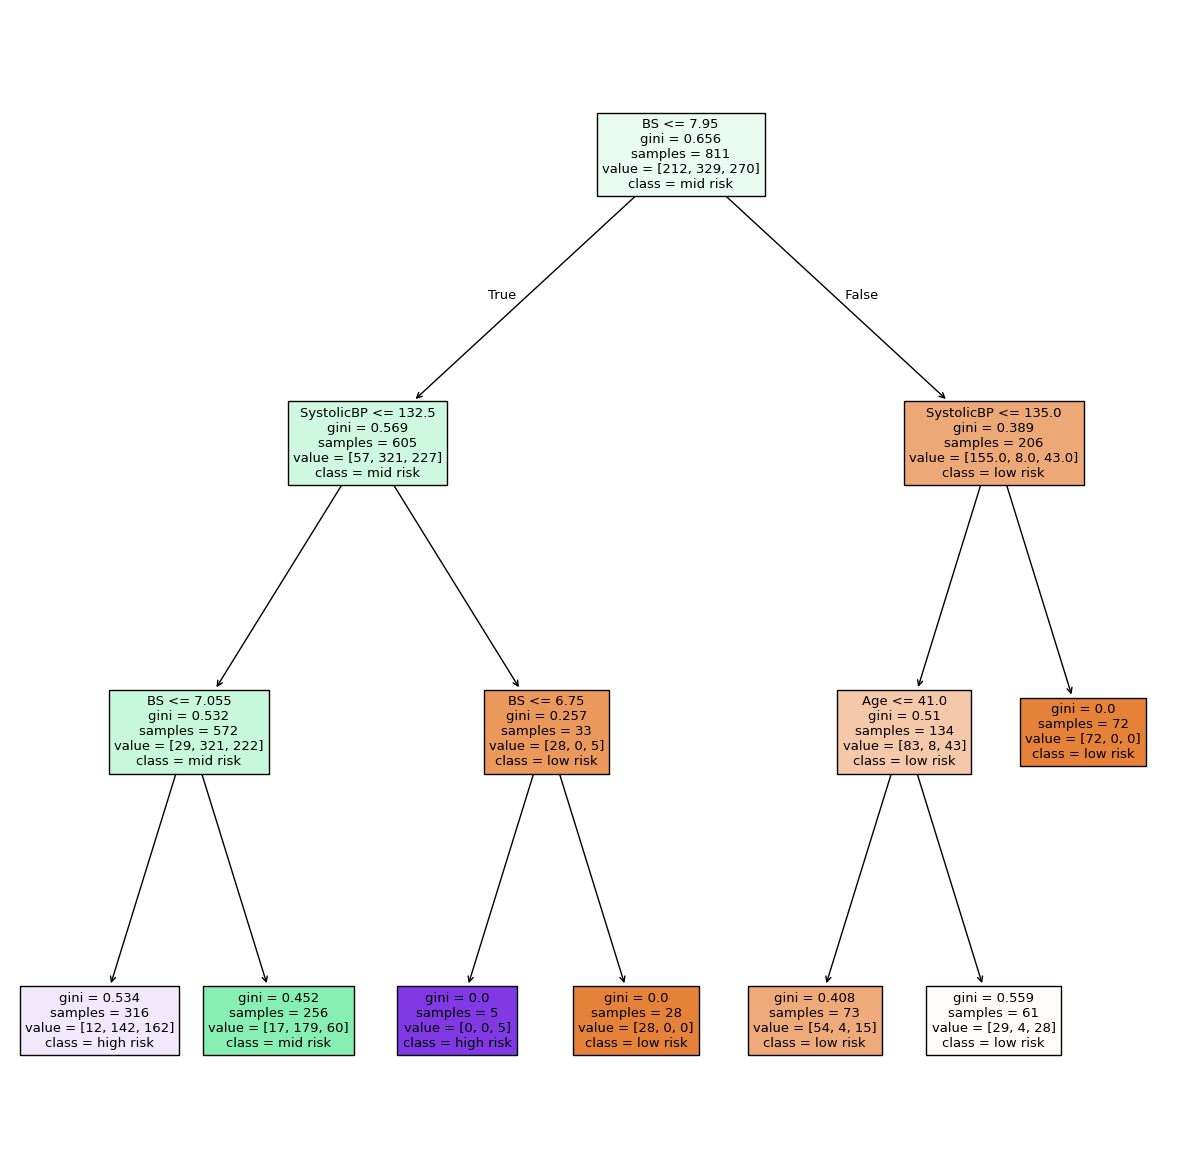

In [19]:
model = DecisionTreeClassifier(criterion='gini',max_depth = 3)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
plt.figure(figsize = (15, 15))
plot_tree(model, feature_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
          class_names = ['low risk', 'mid risk', 'high risk'], filled = True)
plt.show()


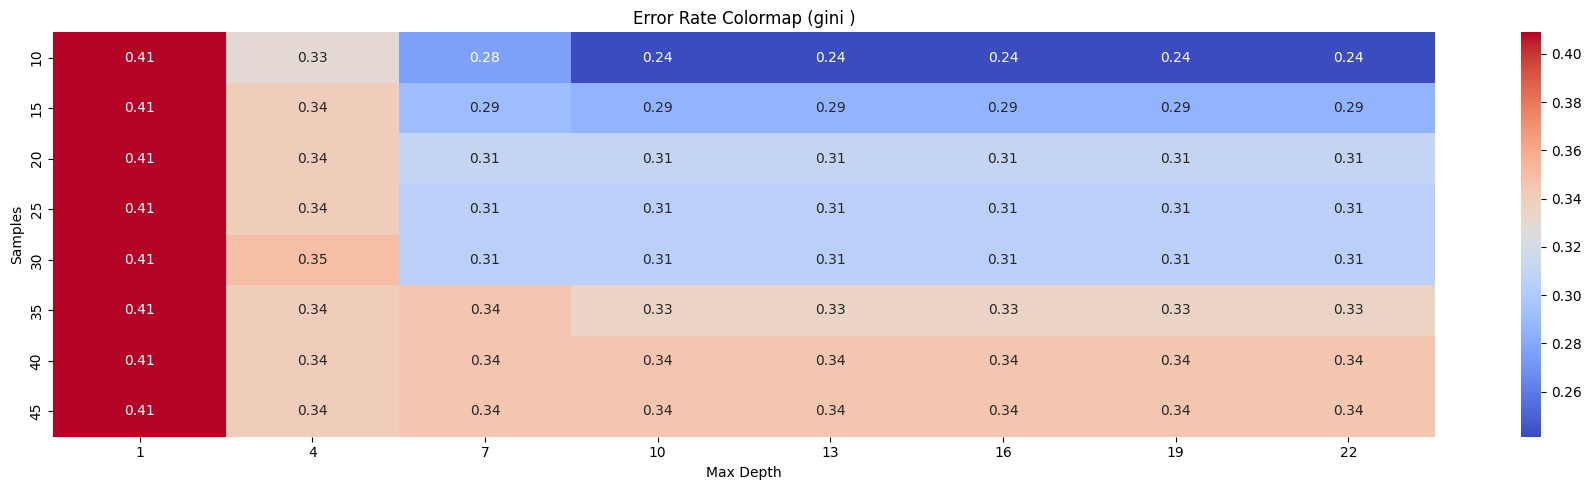

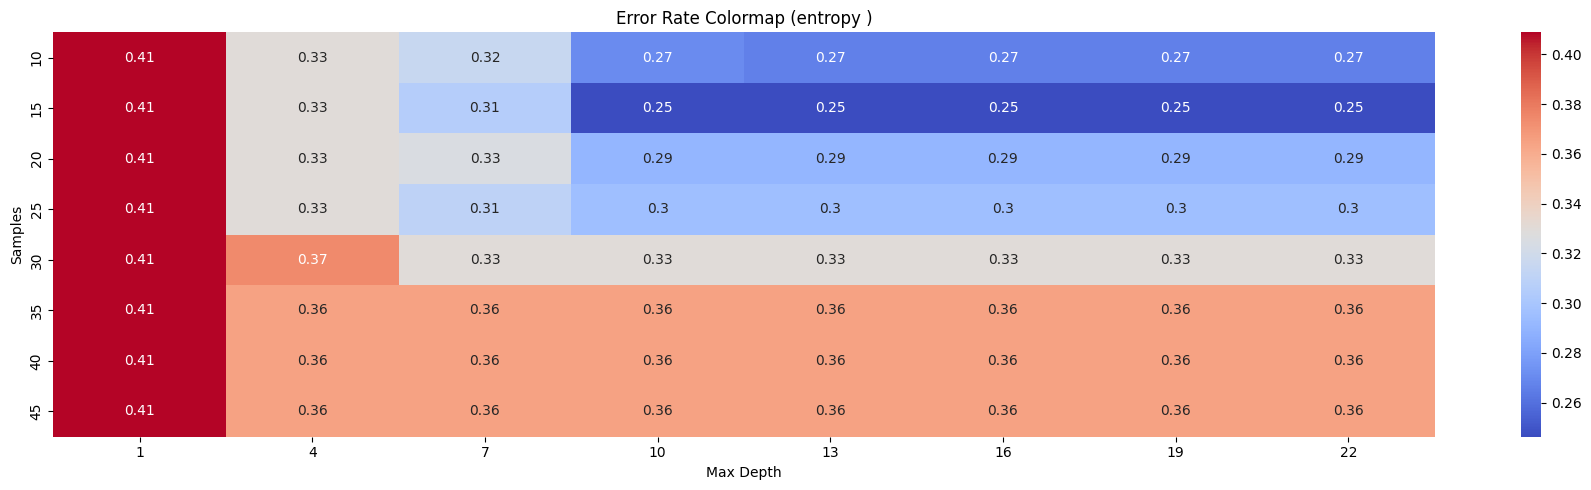

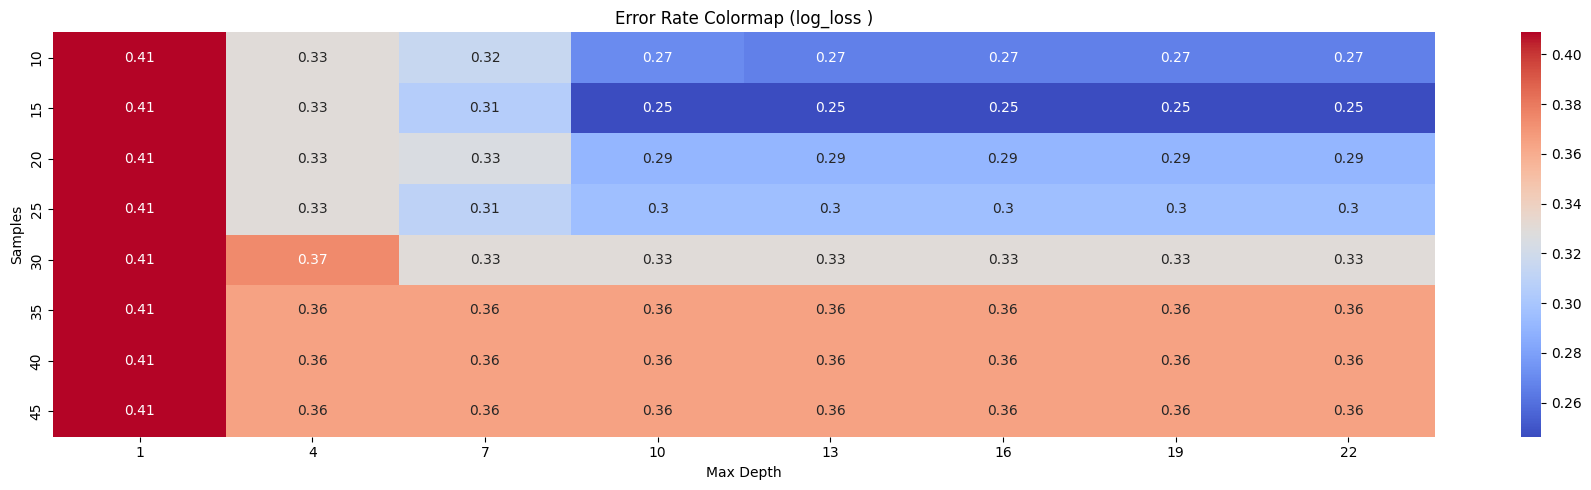

In [20]:

criteria = ['gini', 'entropy', 'log_loss']
max_depth_range = range(1, 25, 3)  # Max depth with step of 5 (1, 6, 11, 16)
samples = range(10, 50, 5)  # Splitter

# Initialize matrices to store test errors
error_matrix = np.zeros((len(samples), len(criteria), len(max_depth_range)))

# Loop through each combination of splitter, criterion, and max depth to calculate errors
for k, min_samples_leaf in enumerate(samples):
    for i, criterion in enumerate(criteria):
        for j, depth in enumerate(max_depth_range):
            # Train decision tree with specific criterion, max depth, and splitter
            tree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, min_samples_leaf=min_samples_leaf, random_state=42)
            tree.fit(X_train, Y_train)

            # Predict and calculate test error
            y_test_pred = tree.predict(X_test)
            test_error = 1 - accuracy_score(Y_test, y_test_pred)
            error_matrix[k, i, j] = test_error

# Plot error heatmaps for each splitter
for i, criteria in enumerate(criteria):
    plt.figure(figsize=(18, 5))

    # Error rate heatmap
    sns.heatmap(error_matrix[:, i, :], annot=True, cmap='coolwarm', xticklabels=max_depth_range, yticklabels=samples)
    plt.xlabel('Max Depth')
    plt.ylabel('Samples')
    plt.title(f'Error Rate Colormap ({criteria} )')

    plt.tight_layout()
    plt.show()



#SVM

In [21]:
model = SVC()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


[[34 19  7]
 [ 0 70  7]
 [ 2 48 16]]
              precision    recall  f1-score   support

   high risk       0.94      0.57      0.71        60
    low risk       0.51      0.91      0.65        77
    mid risk       0.53      0.24      0.33        66

    accuracy                           0.59       203
   macro avg       0.66      0.57      0.57       203
weighted avg       0.65      0.59      0.57       203



In [22]:
# Define the parameter grid for C and gamma
param_grid = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100, 10000],
    'gamma': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 10000, 'gamma': 1}
Best Accuracy: 0.7792547148375368


In [23]:
model = SVC(C = grid_search.best_params_['C'], gamma = grid_search.best_params_['gamma'])
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


[[51  8  1]
 [ 0 68  9]
 [ 4 10 52]]
              precision    recall  f1-score   support

   high risk       0.93      0.85      0.89        60
    low risk       0.79      0.88      0.83        77
    mid risk       0.84      0.79      0.81        66

    accuracy                           0.84       203
   macro avg       0.85      0.84      0.84       203
weighted avg       0.85      0.84      0.84       203



In [24]:
model = SVC(C = grid_search.best_params_['C'], gamma = grid_search.best_params_['gamma'], kernel = 'linear')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


[[34  9 17]
 [ 1 62 14]
 [ 9 39 18]]
              precision    recall  f1-score   support

   high risk       0.77      0.57      0.65        60
    low risk       0.56      0.81      0.66        77
    mid risk       0.37      0.27      0.31        66

    accuracy                           0.56       203
   macro avg       0.57      0.55      0.54       203
weighted avg       0.56      0.56      0.55       203



In [25]:
model = SVC(C = grid_search.best_params_['C'], gamma = grid_search.best_params_['gamma'], kernel = 'sigmoid')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


[[ 0 60  0]
 [ 0 77  0]
 [ 0 66  0]]
              precision    recall  f1-score   support

   high risk       0.00      0.00      0.00        60
    low risk       0.38      1.00      0.55        77
    mid risk       0.00      0.00      0.00        66

    accuracy                           0.38       203
   macro avg       0.13      0.33      0.18       203
weighted avg       0.14      0.38      0.21       203



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Random Forest

In [26]:


# Define the model
rf = RandomForestClassifier()

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, Y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Ініціалізація Random Forest моделі
clf = RandomForestClassifier(n_estimators=50, min_samples_split = 2, random_state=42)

# Навчання моделі
clf.fit(X_train, Y_train)

# Прогнозування на тестовій вибірці
y_pred = clf.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(Y_test, y_pred)
print(f"Точність моделі: {accuracy:.2f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.0
Точність моделі: 0.85


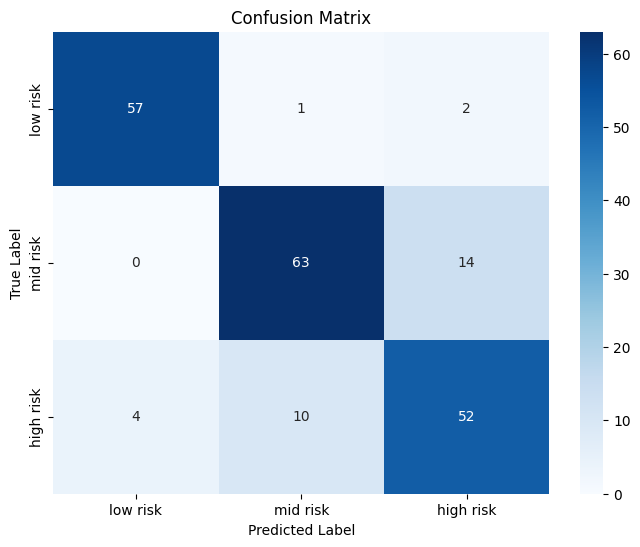

In [27]:
cm = confusion_matrix(Y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['low risk', 'mid risk', 'high risk'],
            yticklabels=['low risk', 'mid risk', 'high risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#AdaBoost

In [39]:
X_train, X_test, y_train, y_test = train_test_split(maternal_health_risk.data.features, maternal_health_risk.data.targets, test_size=0.20)

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base classifier
base_estimator = DecisionTreeClassifier()

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3]  # Set the depth of the decision tree
}

# Initialize AdaBoost with the base classifier
clf = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Initialize GridSearchCV for parameter tuning
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Train the model with parameter search
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Accuracy of the model on the test set with the best parameters
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test_scaled, y_test)
print(f"Accuracy of the best model: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters: {'estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 50}
Accuracy of the best model: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


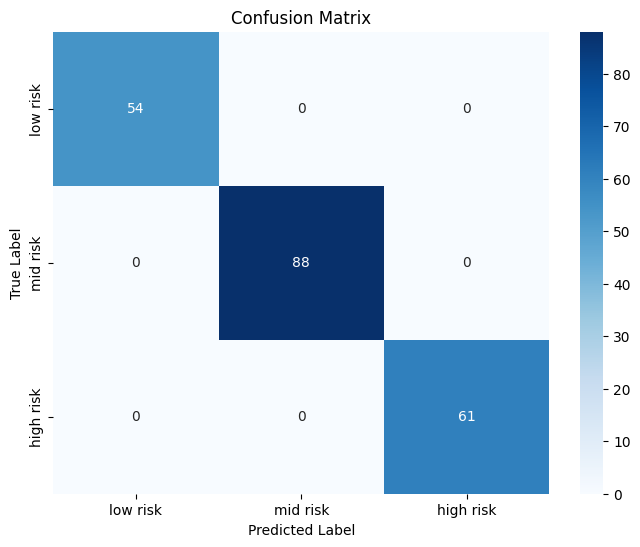

In [38]:
# Ініціалізація базового класифікатора (наприклад, дерево рішень)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Ініціалізація моделі AdaBoost
clf = AdaBoostClassifier(estimator=grid_search.best_estimator_, learning_rate=grid_search.best_params_['learning_rate'], n_estimators=grid_search.best_params_['n_estimators'], algorithm ='SAMME.R')

# Навчання моделі
clf.fit(X_train_scaled, y_train)

# Прогнозування на тестовій вибірці
y_pred = clf.predict(X_test_scaled)

# Створення матриці плутанини
cm = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['low risk', 'mid risk', 'high risk'],
            yticklabels=['low risk', 'mid risk', 'high risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(maternal_health_risk.data.features, maternal_health_risk.data.targets, test_size=0.20)

# Initialize the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base classifier (SVC)
base_estimator = SVC(probability=True)

# Initialize AdaBoostClassifier
clf = AdaBoostClassifier(estimator=base_estimator)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__C': [0.1, 1.0, 10.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with parameter search
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Accuracy of the model on the test set with the best parameters
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test_scaled, y_test)
print(f"Accuracy of the best model: {accuracy:.2f}")

# Initialize base classifier (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost with the best parameters found from GridSearchCV
clf = AdaBoostClassifier(
    estimator=grid_search.best_estimator_,
    learning_rate=grid_search.best_params_['learning_rate'],
    n_estimators=grid_search.best_params_['n_estimators'],
    algorithm='SAMME.R'
)

# Train the model
clf.fit(X_train_scaled, y_train)

# Predict the target for the test set
y_pred = clf.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(Y_test, y_pred))
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['low risk', 'mid risk', 'high risk'],
            yticklabels=['low risk', 'mid risk', 'high risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
